In [246]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [247]:
df=pd.read_csv("/content/customer_attrition (2).csv")

In [248]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [249]:
#Dropping customerID column
df.drop('customerID',axis='columns',inplace=True)

In [250]:
#Display first 5 columns of a dataframe
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [251]:
#Displaying data types of each column of a dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [252]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [253]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [254]:
#Converting 'TotalCharges' to numeric values, replacing non-numeric entries with NaN
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [255]:
# Identifying rows in 'TotalCharges' that could not be converted to numeric values and stores the result as a boolean Series in 'd_frame'
d_frame = pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
d_frame

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [256]:
df[d_frame]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [257]:
df[d_frame].shape

(11, 20)

In [258]:
df.shape

(7043, 20)

In [259]:
# Displaying data of 1082th row
df.iloc[1082]

gender                             Male
SeniorCitizen                         0
Partner                             Yes
Dependents                          Yes
tenure                                0
PhoneService                        Yes
MultipleLines                       Yes
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       Two year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    25.75
TotalCharges                           
Churn                                No
Name: 1082, dtype: object

In [260]:
df.iloc[1082]['TotalCharges']

' '

In [261]:
#Filtering out rows from 'df' where 'TotalCharges' is an empty string and stores the result in 'df1'
df1 = df[df.TotalCharges!=' ']
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [262]:
df1.shape

(7032, 20)

In [263]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [264]:
# Converting the 'TotalCharges' column in 'df1' to numeric values and stores the result in 'df2'
df2 = pd.to_numeric(df1.TotalCharges)
df2

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [265]:
df2.dtypes

dtype('float64')

In [266]:
df2.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [267]:
# Displaying 'df1' to include only the rows where 'Churn' is 'No'

df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


['No' 'Yes']
[5163 1869]


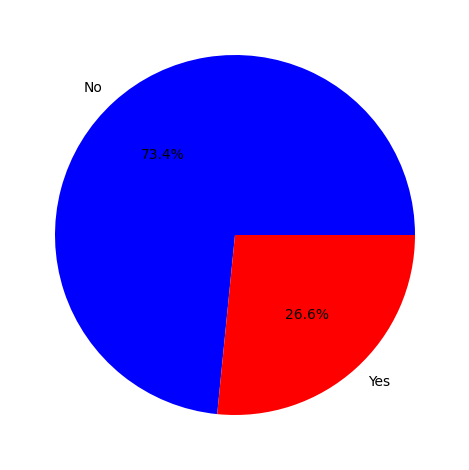

In [268]:
# Converting the numpy.ndarray to a list
churn_values = df1['Churn'].tolist()

# Converting the list to a NumPy array
churn_values = np.array(churn_values)

unique, counts = np.unique(churn_values, return_counts=True)
churn = dict(zip(unique, counts))

print(unique)
print(counts)

# Plot the pie chart
plt.pie(churn.values(), labels=['No','Yes'], colors=['blue', 'red'], autopct='%1.1f%%')
plt.tight_layout()
plt.show()

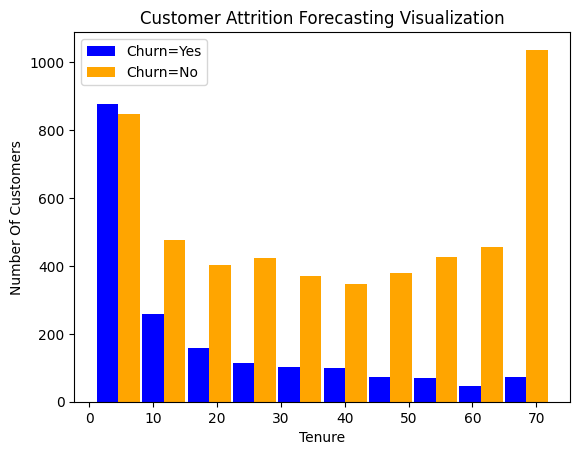

In [269]:
# To visualize the distribution of customer tenure for those who have churned (left the service)
# versus those who have not churned (remained with the service).

churn_no = df1[df1.Churn=='No'].tenure
churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Attrition Forecasting Visualization")

plt.hist([churn_yes, churn_no], rwidth=0.95, color=['blue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [270]:
#This function prints the unique values in each column of the DataFrame that has a data type of 'object'
def unique_values_in_columns(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [271]:
df2 = unique_values_in_columns(df1)
df2

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [272]:
# Replace 'No internet service' with 'No' in the 'df1' DataFrame
df1.replace('No internet service','No',inplace=True)

# Replace 'No phone service' with 'No' in the 'df1' DataFrame
df1.replace('No phone service','No',inplace=True)

<ipython-input-272-ff2e6aa28ec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-272-ff2e6aa28ec2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [273]:
unique_values_in_columns(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [274]:
# List of columns containing 'Yes' and 'No' values to be converted to 1s and 0s
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
# Iterate over each column in the list
for column in yes_no_columns:
     # Replace 'Yes' with 1 and 'No' with 0 in the specified column of 'df1'
      df1[column].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-274-e280d8dcc65e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({'Yes': 1,'No': 0},inplace=True)


In [275]:
# Iterate over each column in the DataFrame 'df1' and Print the column name and its unique values
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [276]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-276-ba153b6b6960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [277]:
df1['gender'].unique()

array([1, 0])

In [278]:
# Perform one-hot encoding on categorical columns 'InternetService', 'Contract', and 'PaymentMethod'
# This creates binary columns for each unique value in these columns, indicating their presence or absence in each row
df3 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df3.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [279]:
df3.head(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [280]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [281]:
from sklearn.preprocessing import MinMaxScaler

In [282]:
# List of columns to be scaled using Min-Max scaling
columns_to_scaling = ['tenure','MonthlyCharges','TotalCharges']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the specified columns in 'df3' using Min-Max scaling
df3[columns_to_scaling] = scaler.fit_transform(df3[columns_to_scaling])

In [283]:
df3.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [284]:
# Iterate over each column in the DataFrame 'df3' and Print the column name and its unique values

for column in df3:
    print(f'{column}: {df3[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [285]:
# Split the data into features (X) and target variable (y)
X = df3.drop('Churn',axis='columns')
y = df3['Churn']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=6)


In [286]:
X_train.shape

(4922, 26)

In [288]:
X_test.shape

(2110, 26)

In [289]:
X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
581,1,0,0,0,0.000000,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
5756,1,0,0,0,0.732394,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6432,0,0,1,0,0.478873,1,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
5488,0,1,1,0,0.619718,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
6112,1,1,1,1,0.915493,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0


In [290]:
y_train

581     1
5756    0
6432    0
5488    0
6112    0
       ..
335     1
4722    0
2009    0
227     1
2766    0
Name: Churn, Length: 4922, dtype: int64

In [291]:
X_test.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5930,1,0,0,0,1.000000,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
5685,0,0,1,1,0.619718,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4297,1,0,0,0,0.619718,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2120,1,0,1,1,0.760563,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3869,0,0,1,0,0.690141,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [292]:
y_test

5930    0
5685    0
4297    0
2120    0
3869    0
       ..
1436    1
6705    0
2313    0
5058    0
453     1
Name: Churn, Length: 2110, dtype: int64

In [50]:
#X_train = X_train.astype('float32')
#y_train = y_train.astype('float32')
#X_test = X_test.astype('float32')
#y_test = y_test.astype('float32')

In [293]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM,Dropout, Bidirectional,GRU
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive
from google.colab import files

# Artificial Neural Network

In [294]:
# Create a Sequential model
ANN_model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
ANN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
ANN_model.summary()

# Train the model
history = ANN_model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 26)                702       
                                                                 
 dense_21 (Dense)            (None, 15)                405       
                                                                 
 dense_22 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1123 (4.39 KB)
Trainable params: 1123 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
154/154 [==============================] - 1s 4ms/step - loss: 0.5560 - accuracy: 0.6944 - val_loss: 0.4616 - val_accuracy: 0.7540
Epoch 2/20
154/154 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.7828 - val_loss: 0.4270 - val_accuracy: 0.8014
Ep

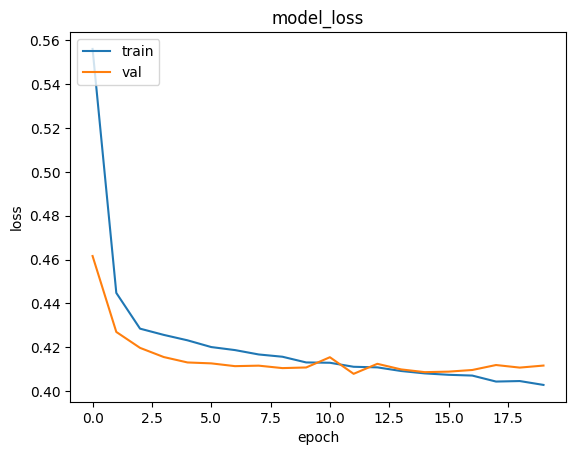

In [295]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

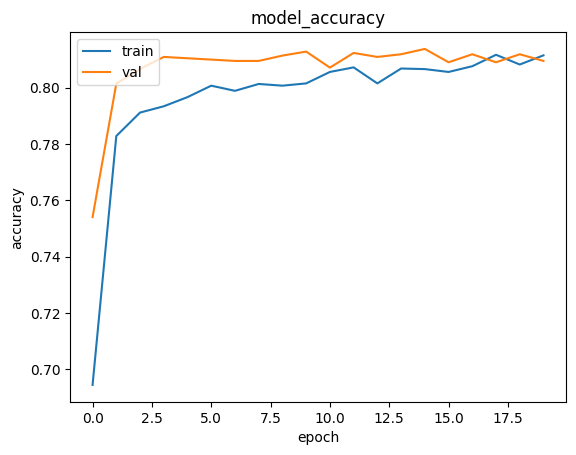

In [296]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [297]:
# Evaluate the ANN model on the test data and print the loss and accuracy
ANN_model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8095


[0.4116550385951996, 0.8094787001609802]

In [298]:
# Use the trained ANN model to make predictions on the test data
yp = ANN_model.predict(X_test)

# Display the first 5 predictions
yp[:5]

66/66 [==============================] - 0s 1ms/step


array([[0.01514436],
       [0.01056368],
       [0.01302053],
       [0.00289496],
       [0.5140655 ]], dtype=float32)

In [299]:
# Convert the continuous predictions to binary predictions using a threshold of 0.5
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [302]:
# Prints the first 13 elements of the y_pred
y_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 1, 0, 1]

In [303]:
# Prints the first 13 elements of the y_test
y_test[:10]

5930    0
5685    0
4297    0
2120    0
3869    0
6532    0
5653    1
765     0
5184    0
4188    1
Name: Churn, dtype: int64

#LSTM

In [304]:
from keras.regularizers import l2

#Create a Sequential LSTM model
LSTM_model = keras.models.Sequential([
    keras.layers.LSTM(128, input_shape= (X_train.shape[1],1),return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1,activation='sigmoid')
])

#Display the model summary
LSTM_model.summary()

#Compile the model
LSTM_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#The code sets up a callback to save the best model checkpoint based on validation accuracy.
checkpoint_filepath = '/content/drive/MyDrive/nlp/attrition_prediction/rnn.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

#Train the model
history = LSTM_model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, callbacks=[model_checkpoint_callback])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 26, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 129       
                                                                 
Total params: 214785 (839.00 KB)
Trainable params: 214785 (839.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
154

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


154/154 [==============================] - 13s 83ms/step - loss: 0.6074 - accuracy: 0.7349 - val_loss: 0.5968 - val_accuracy: 0.7327
Epoch 3/20
154/154 [==============================] - 13s 82ms/step - loss: 0.5603 - accuracy: 0.7349 - val_loss: 0.5169 - val_accuracy: 0.7327
Epoch 4/20
154/154 [==============================] - 14s 91ms/step - loss: 0.5237 - accuracy: 0.7349 - val_loss: 0.5026 - val_accuracy: 0.7327
Epoch 5/20
154/154 [==============================] - 13s 84ms/step - loss: 0.5078 - accuracy: 0.7351 - val_loss: 0.4898 - val_accuracy: 0.7327
Epoch 6/20
154/154 [==============================] - 13s 85ms/step - loss: 0.4914 - accuracy: 0.7369 - val_loss: 0.4758 - val_accuracy: 0.7327
Epoch 7/20
154/154 [==============================] - 14s 93ms/step - loss: 0.4843 - accuracy: 0.7395 - val_loss: 0.4834 - val_accuracy: 0.7341
Epoch 8/20
154/154 [==============================] - 14s 92ms/step - loss: 0.4751 - accuracy: 0.7446 - val_loss: 0.4754 - val_accuracy: 0.7327
Epo

In [306]:
# Evaluate the LSTM model on the test data and print the loss and accuracy
LSTM_model.evaluate(X_test, y_test)

66/66 [==============================] - 3s 45ms/step - loss: 0.4465 - accuracy: 0.7948


[0.446471244096756, 0.7947867512702942]

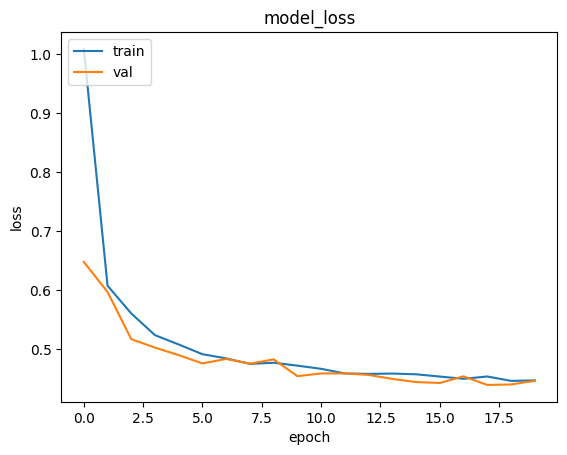

In [307]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

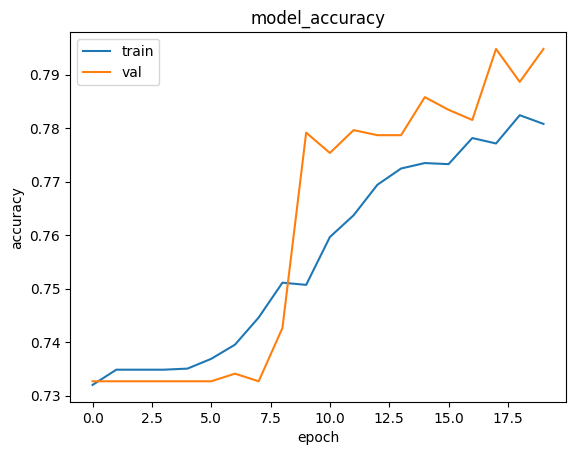

In [308]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [309]:
# Use the trained LSTM model to make predictions on the test data
yp1 = LSTM_model.predict(X_test)
yp1[:10]

66/66 [==============================] - 4s 46ms/step


array([[0.1032057 ],
       [0.05249276],
       [0.07196443],
       [0.03803809],
       [0.41176865],
       [0.06348296],
       [0.62353075],
       [0.46249396],
       [0.09638767],
       [0.5853557 ]], dtype=float32)

In [310]:
y_pred1 = []
for element in yp1:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [311]:
y_pred1[:13]

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [312]:
y_test[:13]

5930    0
5685    0
4297    0
2120    0
3869    0
6532    0
5653    1
765     0
5184    0
4188    1
5240    0
4430    0
3179    0
Name: Churn, dtype: int64

#GRU

In [313]:
from keras.regularizers import l2

#Create a Sequential GRU model
GRU_model = Sequential([
    Bidirectional(GRU(64, return_sequences=True, activation='tanh'), input_shape=(X_train.shape[1], 1)),
    Bidirectional(GRU(64, return_sequences=True)),
    Bidirectional(GRU(64)),
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

#Compile the model
GRU_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#This code sets up an EarlyStopping callback to monitor the validation loss and
#stop training if it doesn't improve for 5 epochs. When training stops, the best weights are restored.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Display the model summary
GRU_model.summary()

#Train the model
history = GRU_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 26, 128)           25728     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 26, 128)           74496     
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                     

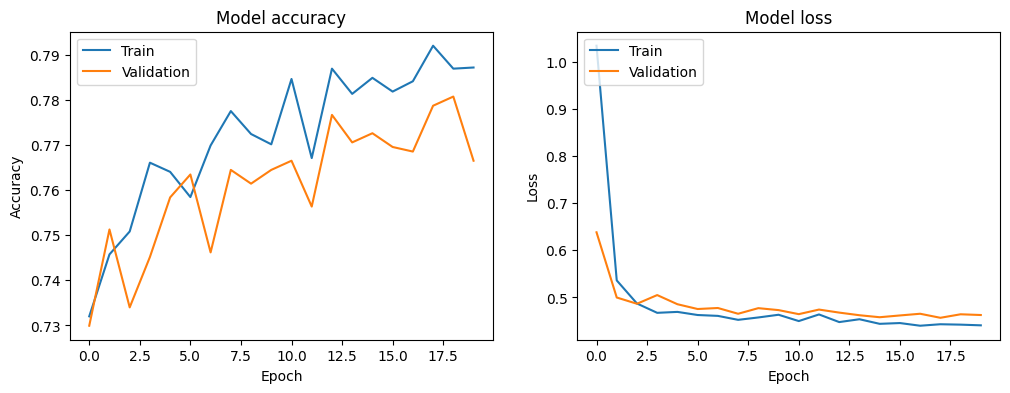

In [314]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [315]:
# Use the trained GRU model to make predictions on the test data
yp2 = GRU_model.predict(X_test)
yp2[:10]

66/66 [==============================] - 4s 17ms/step


array([[0.04321873],
       [0.02668013],
       [0.04916486],
       [0.02863086],
       [0.276874  ],
       [0.07458422],
       [0.6607788 ],
       [0.53725386],
       [0.03311691],
       [0.6274316 ]], dtype=float32)

In [316]:
y_pred2 = []
for element in yp2:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [317]:
y_pred2[:13]

[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

In [318]:
y_test[:13]

5930    0
5685    0
4297    0
2120    0
3869    0
6532    0
5653    1
765     0
5184    0
4188    1
5240    0
4430    0
3179    0
Name: Churn, dtype: int64

In [319]:
from sklearn.metrics import confusion_matrix , classification_report

#For ANN model
print(classification_report(y_test,y_pred))

#For LSTM model
print(classification_report(y_test,y_pred1))

#For GRU model
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1546
           1       0.67      0.58      0.62       564

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1546
           1       0.64      0.52      0.57       564

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1546
           1       0.59      0.62      0.61       564

    accuracy                           0.78      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.78      0.79      2110



Text(95.72222222222221, 0.5, 'Truth')

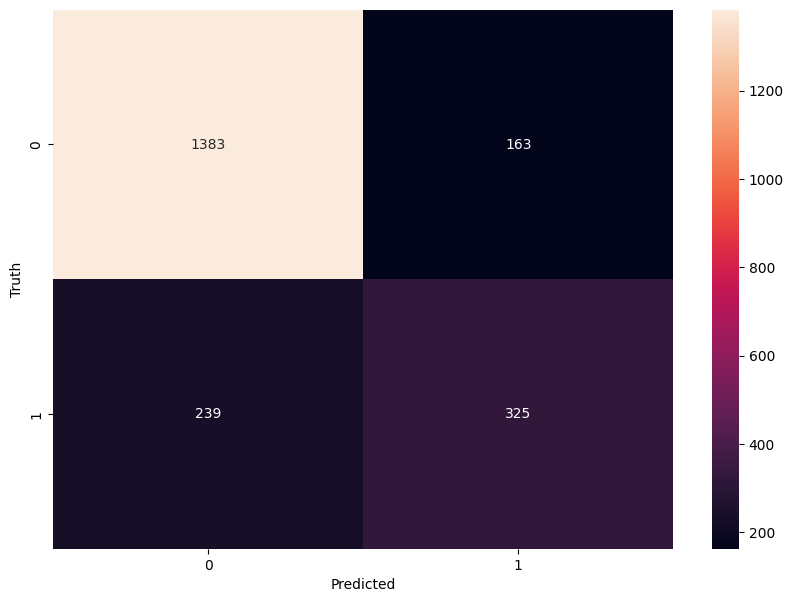

In [320]:
#Print confusion matrix for ANN model
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

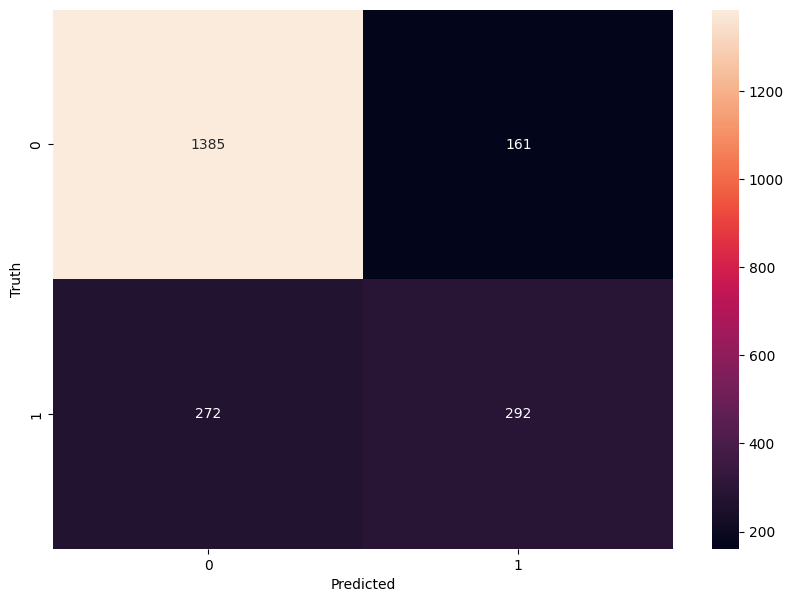

In [321]:
#Print confusion matrix for LSTM model
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred1)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

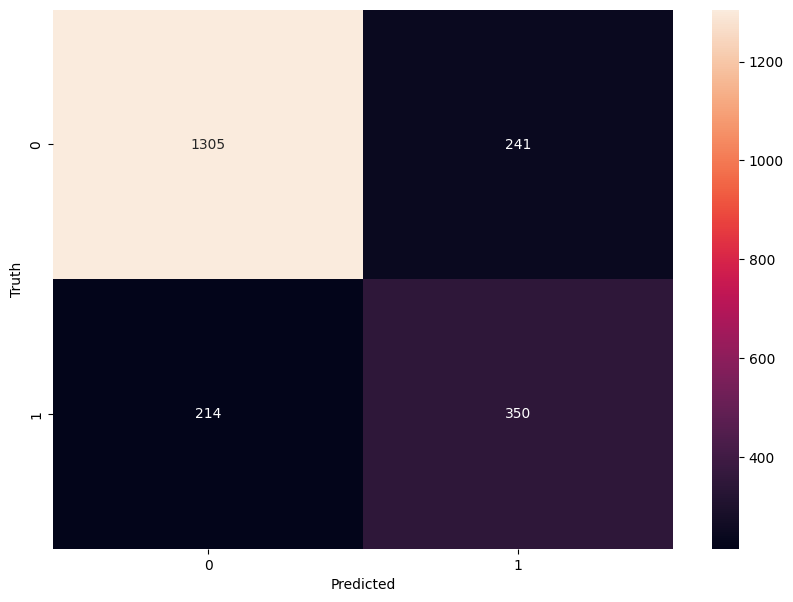

In [322]:
#Print confusion matrix for GRU model
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred2)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#Support Vector Classifier

In [323]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Create object for support vector classifier
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [324]:
# Use the trained SVC model to make predictions on the test data
y_pred_svc = svc.predict(X_test)
y_pred_svc[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [325]:
y_test[:10]

5930    0
5685    0
4297    0
2120    0
3869    0
6532    0
5653    1
765     0
5184    0
4188    1
Name: Churn, dtype: int64

In [326]:
# Print the classification report to evaluate the SVC model's performance on the test data
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1546
           1       0.67      0.54      0.60       564

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



Text(95.72222222222221, 0.5, 'Truth')

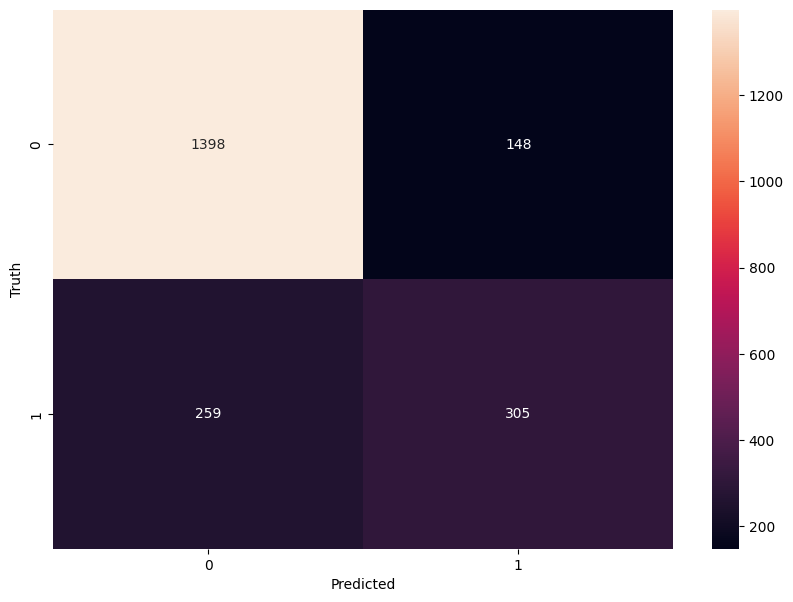

In [327]:
#Print confusion matrix for support vector classifier
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_svc)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [328]:
#Calculate the accuracy of the SVC model on the training data
svc.score(X_train,y_train)

0.8161316537992686

In [329]:
# Calculate the accuracy of the SVC model on the testing data
svc.score(X_test,y_test)

0.8071090047393364

In [330]:
accuracy_score(y_test, y_pred_svc)

0.8071090047393364

#Decision Tree Classifier

In [331]:
from sklearn.tree import DecisionTreeClassifier

#Create object for Decision Tree Classifier
dec_tre_cls = DecisionTreeClassifier()

dec_tre_cls.fit(X_train, y_train)

DecisionTreeClassifier()

In [332]:
# Use the trained DecisionTreeClassifier model to make predictions on the test data
y_pred_dec_tre_cls = dec_tre_cls.predict(X_test)
y_pred_dec_tre_cls[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [333]:
y_test[:10]

5930    0
5685    0
4297    0
2120    0
3869    0
6532    0
5653    1
765     0
5184    0
4188    1
Name: Churn, dtype: int64

In [334]:
print(classification_report(y_test, y_pred_dec_tre_cls))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1546
           1       0.49      0.51      0.50       564

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



Text(95.72222222222221, 0.5, 'Truth')

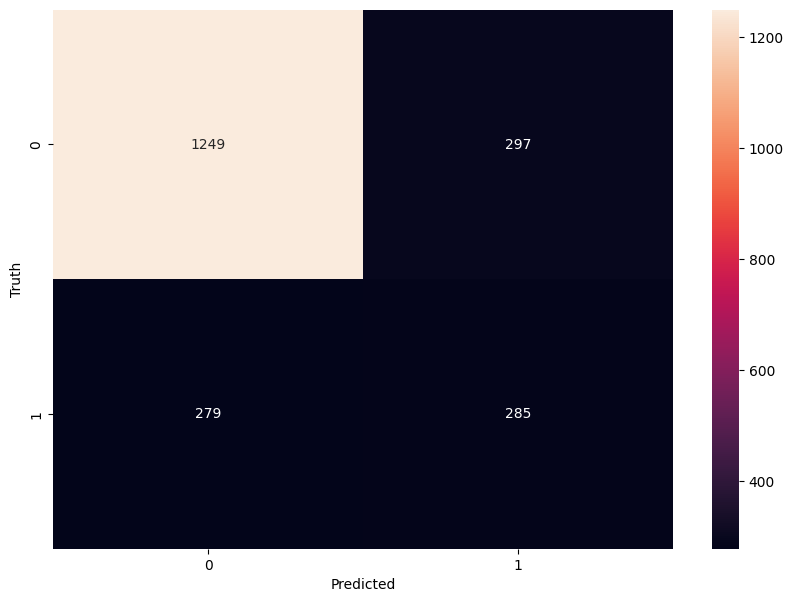

In [335]:
#Print the confusion matrix for Decision Tree Classifier
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_dec_tre_cls)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [336]:
dec_tre_cls.score(X_train,y_train)

0.9983746444534742

In [337]:
dec_tre_cls.score(X_test,y_test)

0.7270142180094786

In [338]:
accuracy_score(y_test, y_pred_dec_tre_cls)

0.7270142180094786

#Logistic Regression

In [339]:
from sklearn.linear_model import LogisticRegression

#Create the object of Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [340]:
# Use the trained LogisticRegression model to make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [341]:
y_test[:10]

5930    0
5685    0
4297    0
2120    0
3869    0
6532    0
5653    1
765     0
5184    0
4188    1
Name: Churn, dtype: int64

In [342]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1546
           1       0.66      0.58      0.62       564

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



Text(95.72222222222221, 0.5, 'Truth')

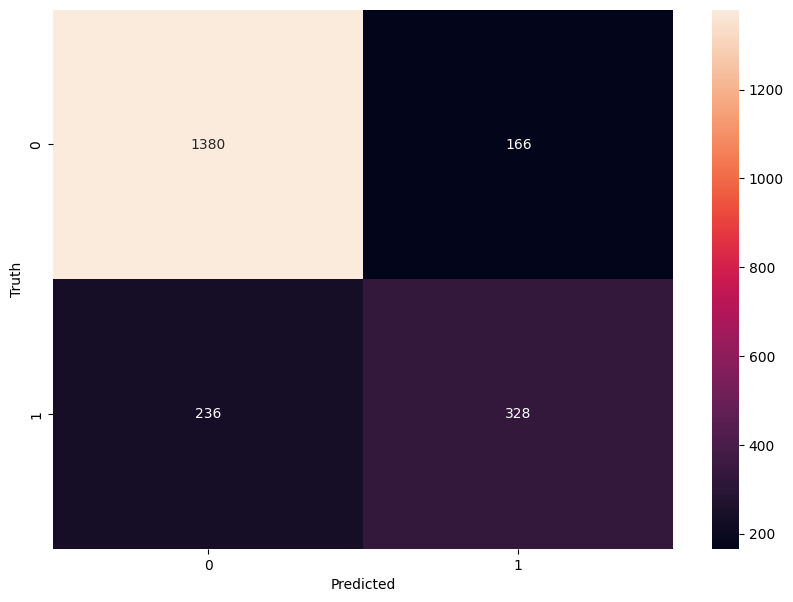

In [343]:
#Print the confusion matrix for Decsion Tree Classifier
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_log_reg)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [344]:
log_reg.score(X_train,y_train)

0.8027224705404307

In [345]:
log_reg.score(X_test,y_test)

0.809478672985782

In [346]:
accuracy_score(y_test, y_pred_log_reg)

0.809478672985782